<a href="https://colab.research.google.com/github/santhoshbaskar11/digital/blob/master/Final_project_Ashif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE**

## *Forecasting Game Downloads and Popularity Classes Using Machine Learning*

#**DOMAIN**

Game Analytics

#**OBJECTIVE**

The objective of this project is to apply machine learning techniques to analyze and predict the success of games using the Best-Selling Games Dataset.

This project focuses on two main tasks:

Regression: To predict the exact number of estimated downloads a game might receive based on features such as price, difficulty, length, review ratings, and supported platforms.

Classification: To categorize games into popularity levels (Low, Medium, High) by classifying them based on the estimated downloads and the same set of features.

#**DataSet Information**

Source - Kaggle

Year - 2025

Total Records
   
   Rows     - 2,380,
   Features - 15 columns
  

#**Type of Problems**

---REGRESSION---

Predict the exact number of downloads
    
    Algorithms plan to do..

Linear Regression

Decision Tree Regressor

Random Forest Regressor

Gradient Boosting Regressor

XGBoost Regressor

K-Nearest Neighbors Regressor


---CLASSIFICATION---

Classify the game into a popularity category
    
    Algorithms plan to do..

  Logistic Regression

  Decision Tree Classifier

  Random Forest Classifier

  K-Nearest Neighbors

  XGBoost Classifier

  Gradient Boosting Classifier

  Support Vector Classifier(SVC)

#**Features and Targets**

input variable(x) = [price,difficulty,length,reviews_like_rate]

   **Regression**

Target(y) = [estimated_downloads]

   **Classification**

Target(y) =[Popularity]

#**STAGE 1**

##Initial EDA

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [11]:
My_Data = 'https://raw.githubusercontent.com/Ashif2507/Final-Projects/refs/heads/main/bestSelling_games.csv'
df=pd.read_csv(My_Data)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
dtypes: float64(2), int64(6), object(7)
mem

In [13]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000


In [14]:
df.shape

(2380, 15)

In [15]:
df.describe()

,reviews_like_rate,all_reviews_number,price,age_restriction,rating,difficulty,length,estimated_downloads
count,2380.000000,2.380000e+03,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,82.413445,3.161508e+04,10.509130,10.605462,3.228017,2.864706,22.965126,2.523007e+06
std,12.643745,2.137197e+05,11.344576,6.395752,0.771203,0.975194,21.247556,1.118283e+07
min,20.000000,1.000000e+01,0.000000,0.000000,0.390000,1.000000,1.000000,9.000000e+01
25%,76.000000,3.420000e+02,2.990000,10.000000,2.750000,2.000000,6.000000,3.500000e+04
50%,85.000000,2.106500e+03,7.990000,13.000000,3.380000,3.000000,16.000000,2.171500e+05
75%,92.000000,1.303000e+04,12.490000,17.000000,3.810000,3.000000,34.000000,1.380000e+06
max,100.000000,8.803754e+06,79.990000,17.000000,4.830000,5.000000,80.000000,3.061700e+08


In [16]:
Check_numerical=df.select_dtypes(include=['number']).columns.tolist()
print(Check_numerical)

['reviews_like_rate', 'all_reviews_number', 'price', 'age_restriction', 'rating', 'difficulty', 'length', 'estimated_downloads']


In [17]:
Check_Categorcial=df.select_dtypes(include='object').columns.tolist()
print(Check_Categorcial)

['game_name', 'release_date', 'developer', 'user_defined_tags', 'supported_os', 'supported_languages', 'other_features']


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.isnull().sum()

,0
game_name,0
reviews_like_rate,0
all_reviews_number,0
release_date,0
developer,0
user_defined_tags,0
supported_os,0
supported_languages,0
price,0
other_features,0


#STAGE 2

##EDA(Visualization) and Pre-processing

In [20]:
#checking Missing Values
df.isnull().sum()

,0
game_name,0
reviews_like_rate,0
all_reviews_number,0
release_date,0
developer,0
user_defined_tags,0
supported_os,0
supported_languages,0
price,0
other_features,0


In [21]:
#checking Duplicates
print(df.duplicated().sum())

0


In [22]:
#checking Shape Before Handling Outliers

df.shape

(2380, 15)

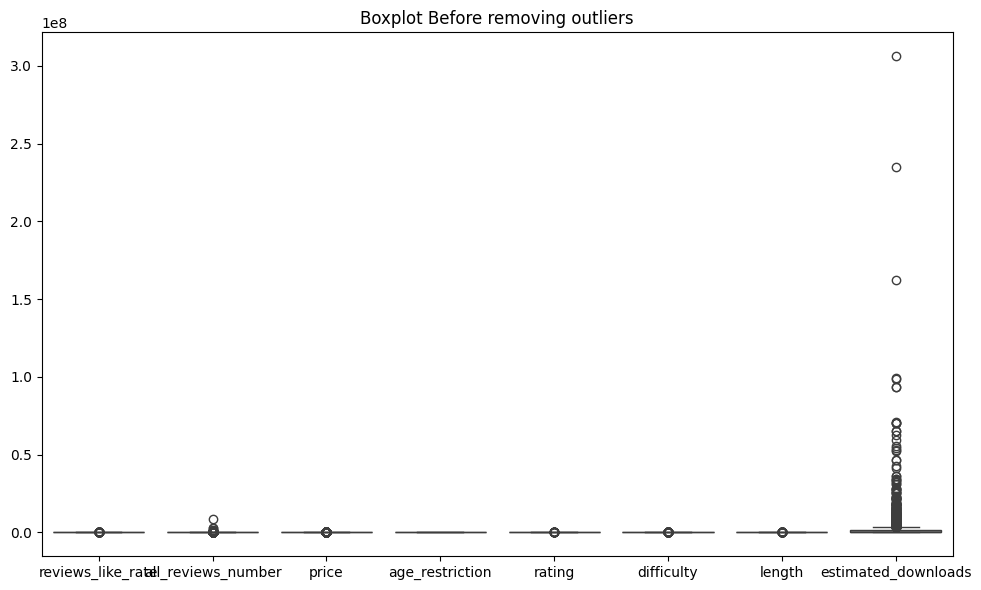

In [23]:
#Visual of Outlier before handling
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.title('Boxplot Before removing outliers')
plt.tight_layout()
plt.show()

In [24]:
#Handling outlier
handle_outliers=['price','difficulty','length','reviews_like_rate','estimated_downloads']
for col in handle_outliers:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  df=df[(df[col]>= lower_bound) & (df[col]<= upper_bound)]

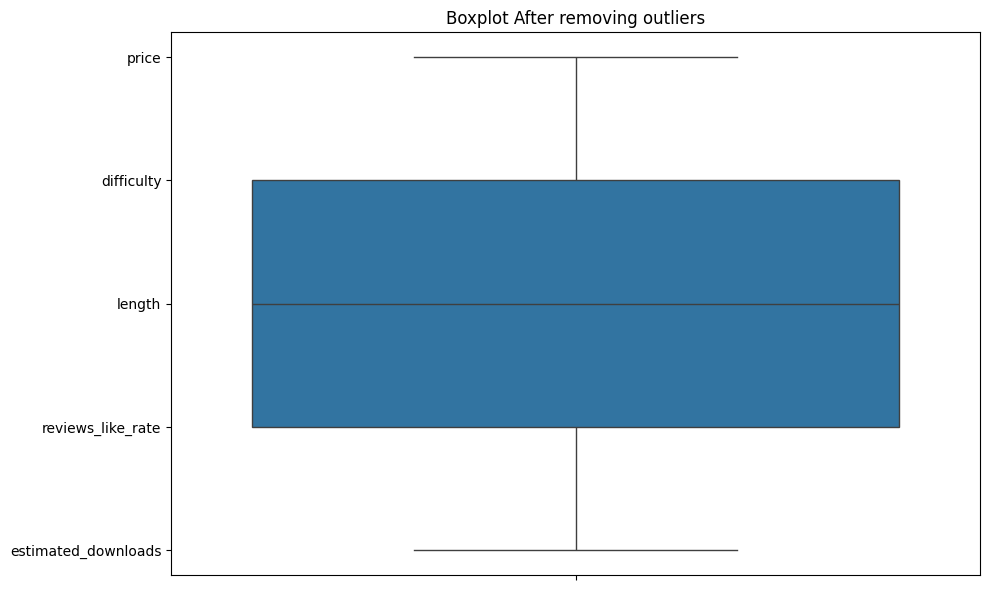

In [25]:
#Visual of After removed Outliers
plt.figure(figsize=(10,6))
sns.boxplot(handle_outliers)
plt.title('Boxplot After removing outliers')
plt.tight_layout()
plt.show()

In [26]:
#shape of After removing outliers
df.shape

(1698, 15)

Notes for Outliers

--Before removing the outlier the dataframe shape is (2380, 15)
       AND
--After removing the outlier the dataframe shape is (1698, 15)       

In [27]:
# Before Handling Skewness

df.shape

(1698, 15)

In [28]:
#Checking skewness before transformation
cols_check = ['price','difficulty','length','reviews_like_rate','estimated_downloads']
for col in cols_check:
  print(f"Skewness of {col}:",df[col].skew())

Skewness of price: 0.9179250546925338
Skewness of difficulty: -0.3018668116508507
Skewness of length: 1.3502146444984562
Skewness of reviews_like_rate: -0.7076799812966819
Skewness of estimated_downloads: 1.8973477016732139


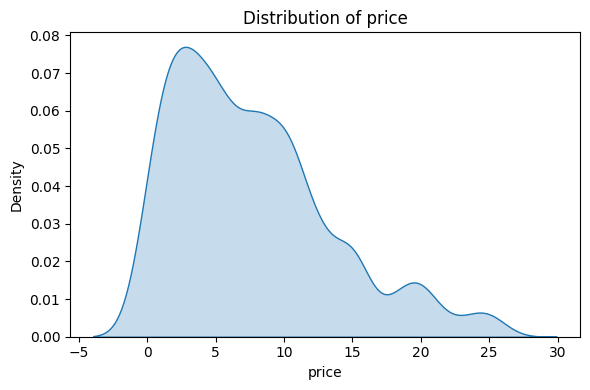

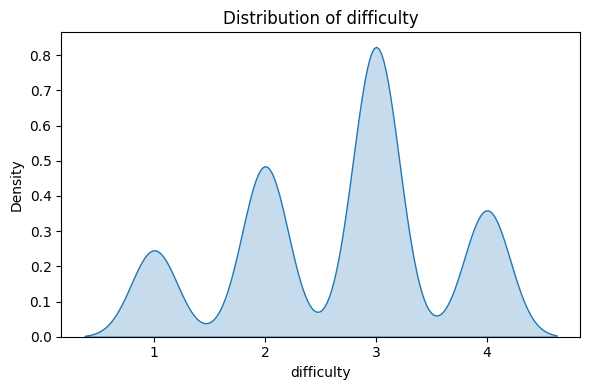

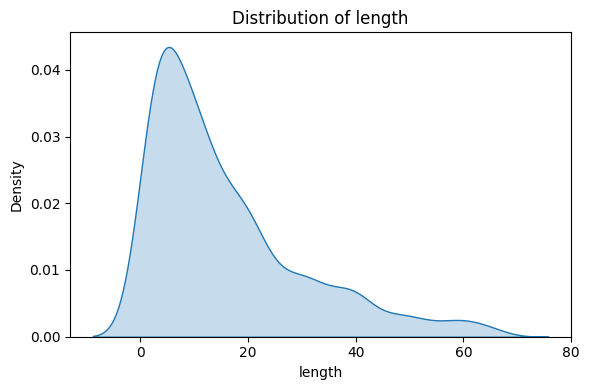

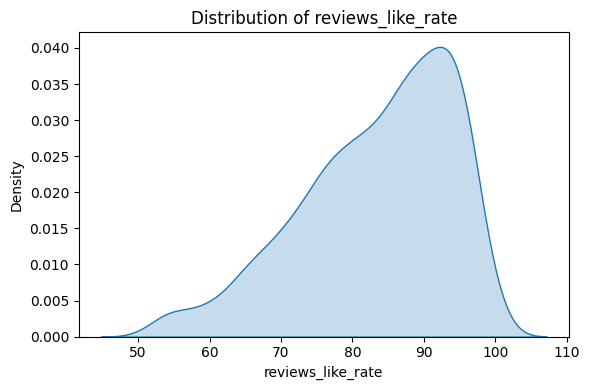

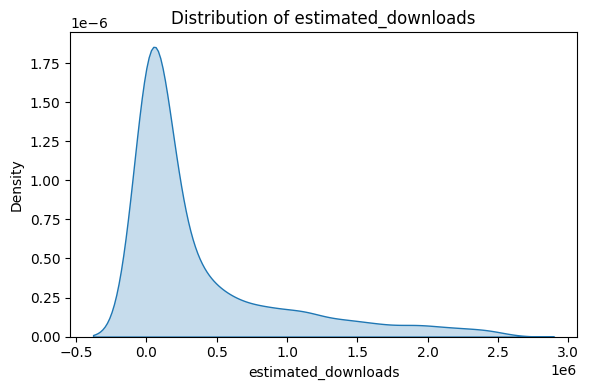

In [29]:
#visual of skewness before transformation
for col in cols_check:
  plt.figure(figsize=(6,4))
  sns.kdeplot(df[col],fill=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1698 entries, 2 to 2378
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            1698 non-null   object 
 1   reviews_like_rate    1698 non-null   int64  
 2   all_reviews_number   1698 non-null   int64  
 3   release_date         1698 non-null   object 
 4   developer            1698 non-null   object 
 5   user_defined_tags    1698 non-null   object 
 6   supported_os         1698 non-null   object 
 7   supported_languages  1698 non-null   object 
 8   price                1698 non-null   float64
 9   other_features       1698 non-null   object 
 10  age_restriction      1698 non-null   int64  
 11  rating               1698 non-null   float64
 12  difficulty           1698 non-null   int64  
 13  length               1698 non-null   int64  
 14  estimated_downloads  1698 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory u

In [31]:
df.describe()

,reviews_like_rate,all_reviews_number,price,age_restriction,rating,difficulty,length,estimated_downloads
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1.698000e+03
mean,83.368080,4454.094229,7.677862,10.171378,3.143528,2.677856,15.979976,3.759239e+05
std,10.619662,16023.615138,5.834986,6.542330,0.756775,0.922701,14.445217,5.581345e+05
min,52.000000,10.000000,0.000000,0.000000,0.480000,1.000000,1.000000,9.000000e+01
25%,76.250000,224.000000,2.990000,0.000000,2.660000,2.000000,5.000000,2.100000e+04
50%,85.000000,1025.000000,6.590000,13.000000,3.250000,3.000000,11.000000,1.035500e+05
75%,92.000000,4167.750000,10.490000,17.000000,3.710000,3.000000,22.000000,4.919250e+05
max,100.000000,578396.000000,25.990000,17.000000,4.830000,4.000000,66.000000,2.520000e+06


In [32]:
# After Handling Skewness
  #Applying log1p Transformation for positively skewned features
df['price']=np.log1p(df['price'])
df['length']=np.log1p(df['length'])
df['estimated_downloads']=np.log1p(df['estimated_downloads'])

In [33]:
#Applying sqrt transformation for left skewed feature

reversed_review=df['reviews_like_rate'].max()+1- df['reviews_like_rate']

df['reviews_like_rate']=np.sqrt(reversed_review)

In [34]:
# checking skewness after the transformation
cols_check = ['price','difficulty','length','reviews_like_rate','estimated_downloads']
for col in cols_check:
  print(f"Skewness of {col}:",df[col].skew())

Skewness of price: -0.5660518660046815
Skewness of difficulty: -0.3018668116508507
Skewness of length: -0.1669862515531445
Skewness of reviews_like_rate: 0.09610996800896042
Skewness of estimated_downloads: -0.4460846160506563


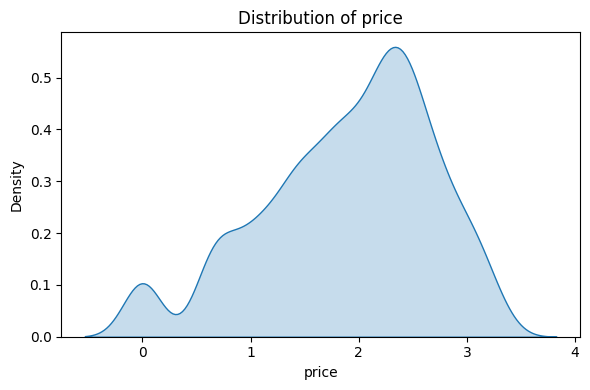

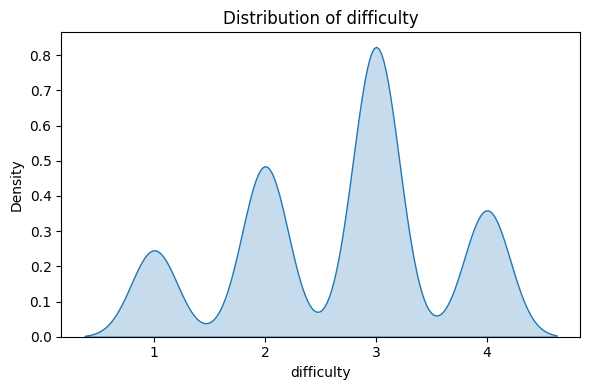

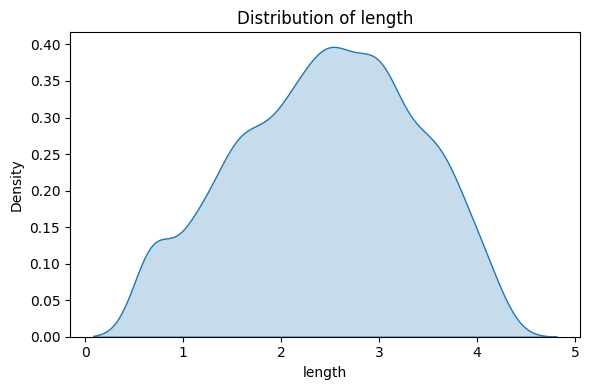

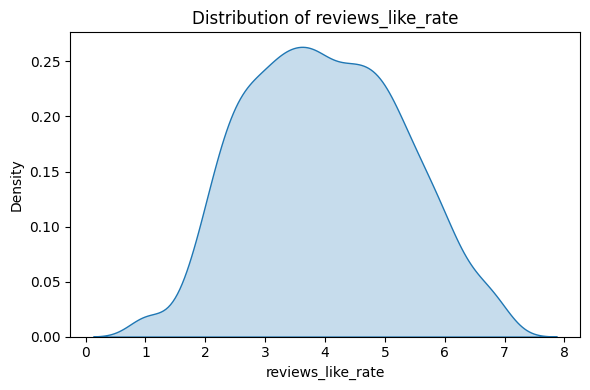

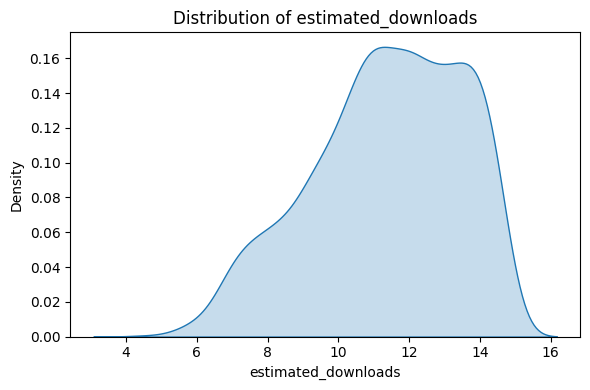

In [35]:
#visual for after skewned feature
for col in cols_check:
  plt.figure(figsize=(6,4))
  sns.kdeplot(df[col],fill=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

In [36]:
df.shape

(1698, 15)

#Visualization

#univariable visual

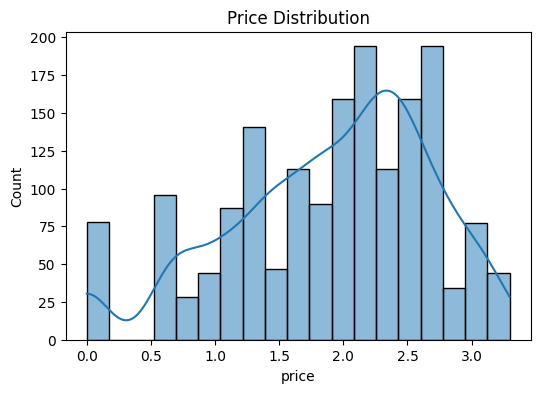

In [37]:
     #price
plt.figure(figsize=(6,4))
sns.histplot(df['price'],kde=True)
plt.title('Price Distribution')
plt.show()









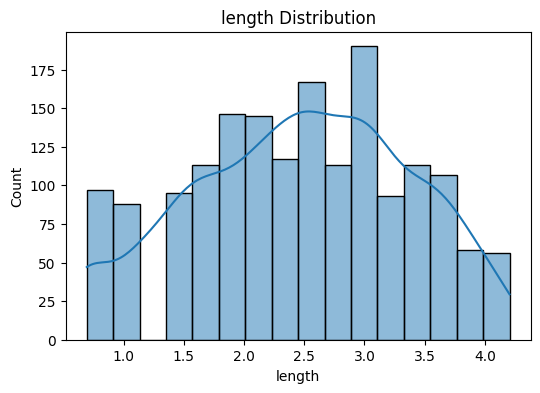

In [38]:
 #lenght
plt.figure(figsize=(6,4))
sns.histplot(df['length'],kde=True)
plt.title('length Distribution')
plt.show()

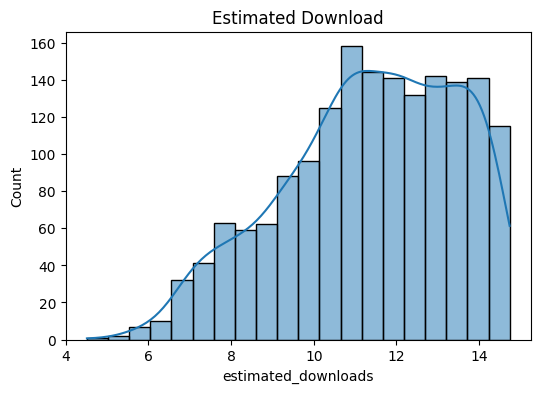

In [39]:
#Estimated Download
plt.figure(figsize=(6,4))
sns.histplot(df['estimated_downloads'],kde=True)
plt.title('Estimated Download')
plt.show()

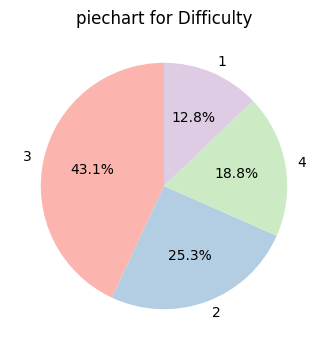

In [40]:
#Difficulty
difficulty_count=df['difficulty'].value_counts()
colors=plt.get_cmap('Pastel1').colors[:len(difficulty_count)]
plt.figure(figsize=(6,4))
difficulty_count.plot.pie(autopct='%1.1f%%',startangle=90,colors=colors)
plt.title('piechart for Difficulty')
plt.ylabel('')
plt.show()

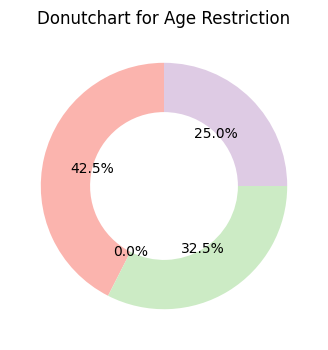

In [41]:
#Age Restriction
age_count=df['age_restriction'].value_counts()
colors=plt.get_cmap('Pastel1').colors[:len(difficulty_count)]
plt.figure(figsize=(6,4))
plt.pie(age_count.index,autopct='%1.1f%%',startangle=90,colors=colors,wedgeprops=dict(width=0.4))
plt.title('Donutchart for Age Restriction')
plt.ylabel('')
plt.show()

#Bivariate visual

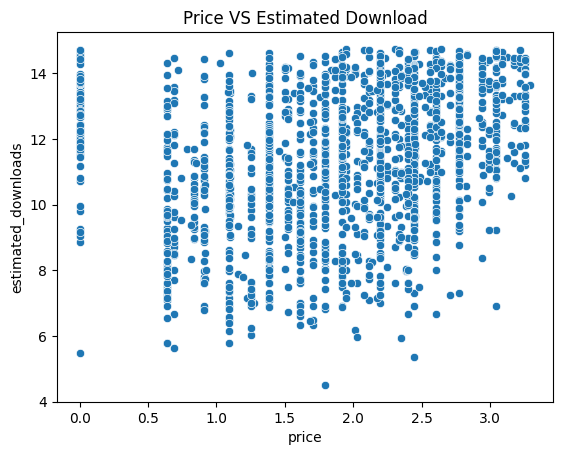

In [42]:
      #price vs estimated downloads
sns.scatterplot(x='price',y='estimated_downloads',data=df)
plt.title('Price VS Estimated Download')
plt.show()

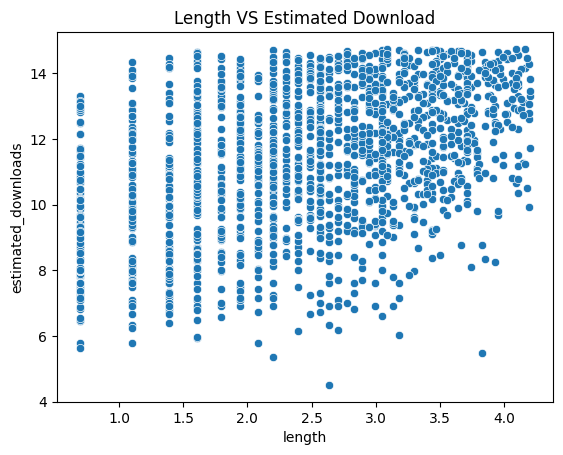

In [43]:
#Length vs Etimated Download
sns.scatterplot(x='length',y='estimated_downloads',data=df)
plt.title('Length VS Estimated Download')
plt.show()

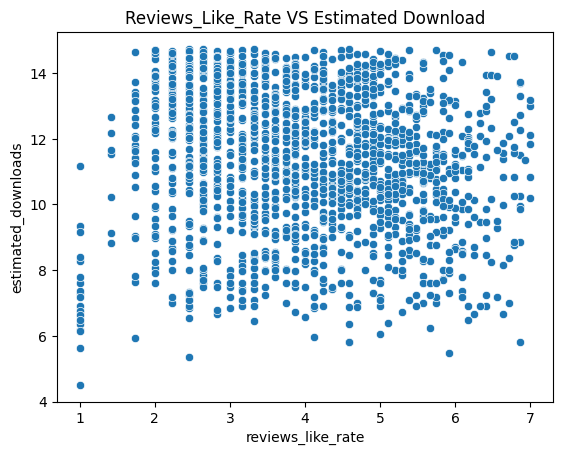

In [44]:
 #Review Like Rate vs Estimated Downloads
sns.scatterplot(x='reviews_like_rate',y='estimated_downloads',data=df)
plt.title('Reviews_Like_Rate VS Estimated Download')
plt.show()

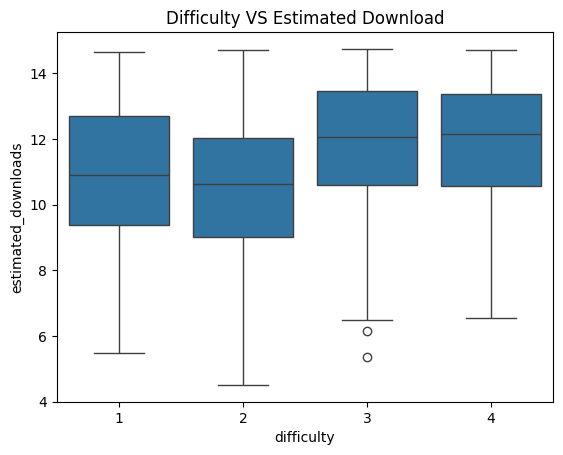

In [45]:
 #Difficulty vs Estimated Downloads
sns.boxplot(x='difficulty',y='estimated_downloads',data=df)
plt.title('Difficulty VS Estimated Download')
plt.show()

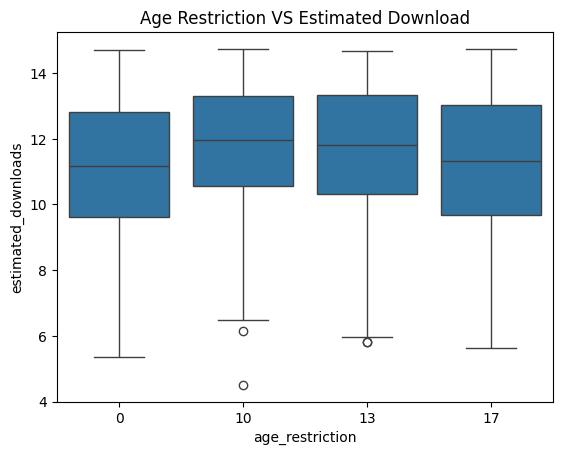

In [46]:
   #Age Restriction vs Estimated Downloads
sns.boxplot(x='age_restriction',y='estimated_downloads',data=df)
plt.title('Age Restriction VS Estimated Download')
plt.show()

#Multivariate visual

<Figure size 600x400 with 0 Axes>

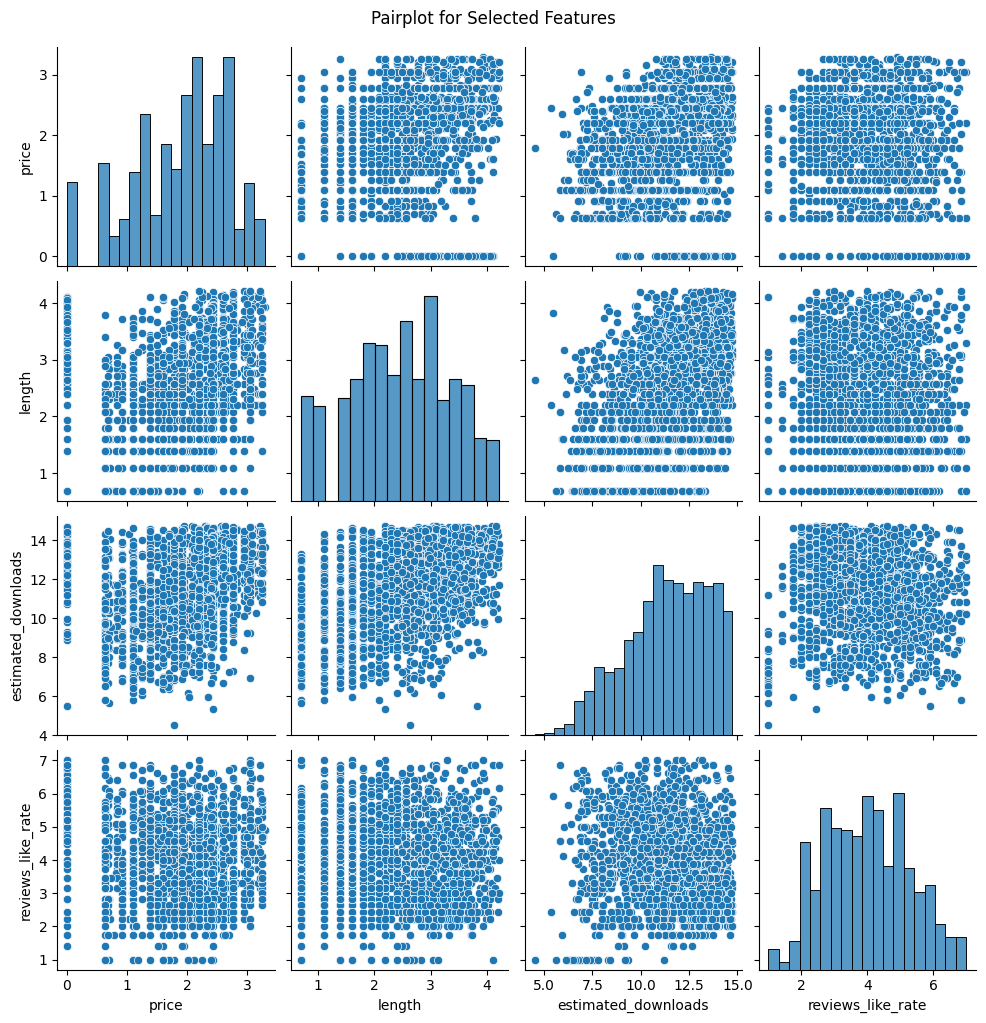

In [47]:
      #Pairplot for Selected Features
plt.figure(figsize=(6,4))
sns.pairplot(df[['price','length','estimated_downloads','reviews_like_rate']])
plt.suptitle('Pairplot for Selected Features',y=1.02)
plt.show()

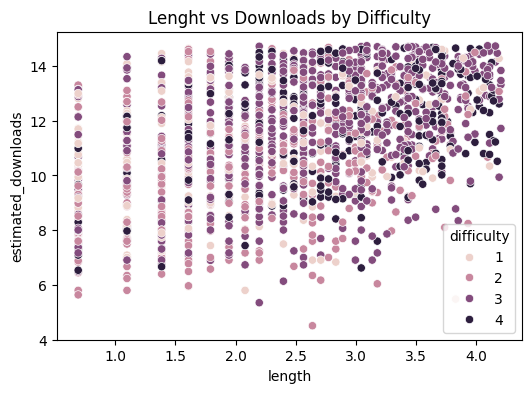

In [48]:
#scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x='length',y='estimated_downloads',hue='difficulty',data=df)
plt.title('Lenght vs Downloads by Difficulty')
plt.show()

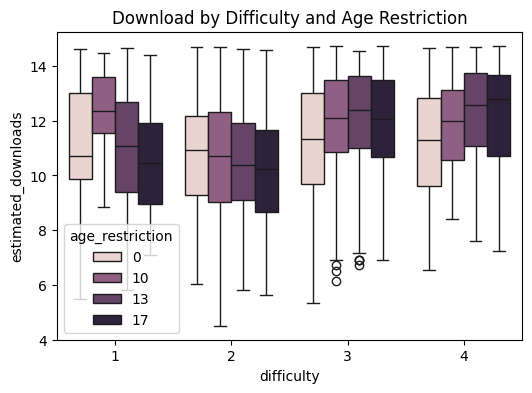

In [49]:
  #Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='difficulty',y='estimated_downloads',hue='age_restriction',data=df)
plt.title('Download by Difficulty and Age Restriction')
plt.show()

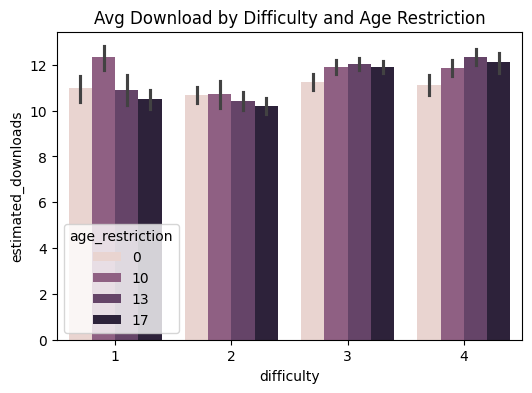

In [50]:
  #Barplot
plt.figure(figsize=(6,4))
sns.barplot(x='difficulty',y='estimated_downloads',hue='age_restriction',data=df)
plt.title('Avg Download by Difficulty and Age Restriction')
plt.show()

#STAGE 3

##Features Selection and Model Building

In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [78]:
df_fe.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads,downloads_raw,popularity
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000,inf,High
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000,inf,High
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000,inf,High
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000,inf,High
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000,inf,High


In [84]:
# Ensure estimated_downloads is log-transformed
df_fe['downloads_raw'] = np.expm1(df_fe['estimated_downloads'])

# Define and apply function
def categorize_popularity(downloads):
    if downloads < 10000:
        return 'Low'
    elif downloads < 100000:
        return 'Medium'
    else:
        return 'High'

df_fe['popularity'] = df_fe['downloads_raw'].apply(categorize_popularity)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [86]:
print(df_fe[['downloads_raw', 'popularity']].head())


   downloads_raw popularity
0            inf       High
1            inf       High
2            inf       High
3            inf       High
4            inf       High


In [88]:
from sklearn.preprocessing import LabelEncoder

# Recreate if missing
df_fe['difficulty_encoded'] = LabelEncoder().fit_transform(df_fe['difficulty'])
df_fe['age_restriction_encoded'] = LabelEncoder().fit_transform(df_fe['age_restriction'])

# Optional: drop original if not needed
# df_fe.drop(['difficulty', 'age_restriction'], axis=1, inplace=True)


In [89]:
# INPUT FEATURES
X = df_fe[['price', 'length', 'reviews_like_rate', 'difficulty_encoded', 'age_restriction_encoded']]

# REGRESSION TARGET
y_reg = df_fe['estimated_downloads']

# CLASSIFICATION TARGET (after popularity is created)
if 'popularity' in df_fe.columns:
    y_clf = df_fe['popularity']
else:
    print("🛑 'popularity' column is missing. Please create it first using log-reversed download values.")

# Check shapes
print("X shape:", X.shape)
print("y_reg shape:", y_reg.shape)
print("y_clf shape:", y_clf.shape)


X shape: (2380, 5)
y_reg shape: (2380,)
y_clf shape: (2380,)


In [90]:
from sklearn.model_selection import train_test_split

# Regression split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42)

# Classification split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42)

# Confirm splits
print("Regression Train:", X_train_reg.shape, y_train_reg.shape)
print("Regression Test:", X_test_reg.shape, y_test_reg.shape)

print("Classification Train:", X_train_clf.shape, y_train_clf.shape)
print("Classification Test:", X_test_clf.shape, y_test_clf.shape)


Regression Train: (1904, 5) (1904,)
Regression Test: (476, 5) (476,)
Classification Train: (1904, 5) (1904,)
Classification Test: (476, 5) (476,)


In [91]:
from sklearn.preprocessing import StandardScaler

# List of features to scale
features_to_scale = ['price', 'length', 'reviews_like_rate', 'difficulty_encoded', 'age_restriction_encoded']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df_fe[features_to_scale] = scaler.fit_transform(df_fe[features_to_scale])


In [92]:
df_fe[features_to_scale].describe().T


,count,mean,std,min,25%,50%,75%,max
price,2380.0,0.000000e+00,1.00021,-0.926552,-0.662934,-0.222103,0.174646,6.125876
length,2380.0,4.776758e-17,1.00021,-1.033989,-0.798618,-0.327877,0.519457,2.684867
reviews_like_rate,2380.0,-4.537920e-16,1.00021,-4.937347,-0.507349,0.204615,0.758365,1.391221
difficulty_encoded,2380.0,-3.582568e-17,1.00021,-1.912541,-0.886888,0.138765,0.138765,2.190071
age_restriction_encoded,2380.0,6.418768e-17,1.00021,-1.432595,-0.563692,0.305211,1.174115,1.174115


In [93]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 3 features most correlated with estimated_downloads
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y_reg)

# Get selected feature names
mask = selector.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features)


Selected Features: Index(['length', 'difficulty_encoded', 'age_restriction_encoded'], dtype='object')


In [94]:
# Example: Filter only 'High' popularity games
df_high_pop = df_fe[df_fe['popularity'] == 'High']


In [95]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest for regression
selector_reg = SelectKBest(score_func=f_regression, k='all')  # use 'all' to score all features
selector_reg.fit(X, y_reg)

# Get scores and p-values
scores = selector_reg.scores_
pvalues = selector_reg.pvalues_

# Create dataframe for better viewing
feature_scores_reg = pd.DataFrame({'Feature': X.columns, 'F-score': scores, 'p-value': pvalues})
feature_scores_reg = feature_scores_reg.sort_values(by='F-score', ascending=False)
print(feature_scores_reg)


                   Feature     F-score       p-value
1                   length  195.337316  1.015648e-42
3       difficulty_encoded   18.831208  1.487815e-05
4  age_restriction_encoded   18.605348  1.673345e-05
0                    price    9.176133  2.478294e-03
2        reviews_like_rate    2.294724  1.299472e-01


In [101]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Train Random Forest Regressor
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluate
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

# Output
print("Regression Model Evaluation")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")


Regression Model Evaluation
R² Score : -0.8174
RMSE     : 8765314.3074


linear regression

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [110]:
# Initialize Linear Regression model
lin_reg_model = LinearRegression()

# Train the model on training data
lin_reg_model.fit(X_train_reg, y_train_reg)


LinearRegression()

In [111]:
# Predict on the test set
y_pred_linreg = lin_reg_model.predict(X_test_reg)

# Evaluate the model
r2_lin = r2_score(y_test_reg, y_pred_linreg)
rmse_lin = np.sqrt(mean_squared_error(y_test_reg, y_pred_linreg))

# Print results
print("Linear Regression Model Evaluation")
print(f"R² Score : {r2_lin:.4f}")
print(f"RMSE     : {rmse_lin:.4f}")


Linear Regression Model Evaluation
R² Score : 0.0730
RMSE     : 6260301.5000


desicion tree


In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [113]:
# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit on training data
tree_model.fit(X_train_reg, y_train_reg)


DecisionTreeRegressor(random_state=42)

In [114]:
# Predict on test data
y_pred_tree = tree_model.predict(X_test_reg)

# Evaluate
r2_tree = r2_score(y_test_reg, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test_reg, y_pred_tree))

# Output
print("Decision Tree Regressor Evaluation")
print(f"R² Score : {r2_tree:.4f}")
print(f"RMSE     : {rmse_tree:.4f}")


Decision Tree Regressor Evaluation
R² Score : -3.4784
RMSE     : 13759692.4897


In [115]:
pip install xgboost


In [116]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [117]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train_reg, y_train_reg)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [118]:
# Predict
y_pred_xgb = xgb_model.predict(X_test_reg)

# Evaluate
r2_xgb = r2_score(y_test_reg, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb))

# Print results
print("XGBoost Regressor Evaluation")
print(f"R² Score : {r2_xgb:.4f}")
print(f"RMSE     : {rmse_xgb:.4f}")


XGBoost Regressor Evaluation
R² Score : -2.4085
RMSE     : 12004105.6278


random forest regressor


In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [120]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train on training data
rf_model.fit(X_train_reg, y_train_reg)


RandomForestRegressor(random_state=42)

In [121]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test_reg)

# Evaluate performance
r2_rf = r2_score(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))

# Print the results
print("Random Forest Regressor Evaluation")
print(f"R² Score : {r2_rf:.4f}")
print(f"RMSE     : {rmse_rf:.4f}")


Random Forest Regressor Evaluation
R² Score : -0.8682
RMSE     : 8886942.5573


gradient booster

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [123]:
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train on training data
gb_model.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(random_state=42)

In [124]:
# Predict on test data
y_pred_gb = gb_model.predict(X_test_reg)

# Evaluate performance
r2_gb = r2_score(y_test_reg, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test_reg, y_pred_gb))

# Print results
print("Gradient Boosting Regressor Evaluation")
print(f"R² Score : {r2_gb:.4f}")
print(f"RMSE     : {rmse_gb:.4f}")


Gradient Boosting Regressor Evaluation
R² Score : -1.0069
RMSE     : 9211160.3681


k-nearest neighbour regressor

In [125]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [126]:
# Initialize KNN Regressor (k=5 by default)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train_reg, y_train_reg)


KNeighborsRegressor()

In [127]:
# Predict on test data
y_pred_knn = knn_model.predict(X_test_reg)

# Evaluate performance
r2_knn = r2_score(y_test_reg, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test_reg, y_pred_knn))

# Output the results
print("K-Nearest Neighbors Regressor Evaluation")
print(f"R² Score : {r2_knn:.4f}")
print(f"RMSE     : {rmse_knn:.4f}")


K-Nearest Neighbors Regressor Evaluation
R² Score : -0.5273
RMSE     : 8035542.8373
